# Exercice Clustering

Dans cet exercice, nous allons utiliser l'algorithme K-means pour classer les fleurs du dataset Iris. 

On va démarrer par la lecture du dataset, puis la construction d'un DataFrame avec les données. 

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


On va créer un nouveau DataFrame avec les données et ajouter à celui-ci une colonne avec la classe d'Iris (colonne target)afin de pouvoir mieux visualiser ce classement.

In [42]:
import pandas as pnd
iris_df = pnd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [44]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Comme le tableau inclut plusieurs *features*, nous pouvons les visualiser par pairs avec matplotlib. Ici dans l'exemple, on voit les colonnes "petal length" et "sepal width".

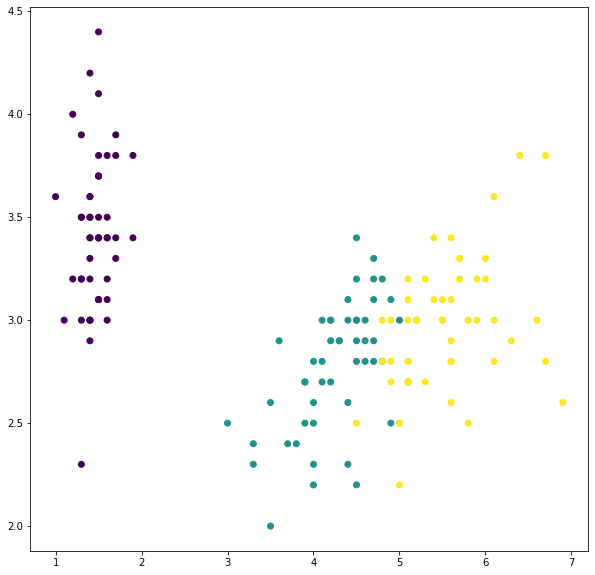

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,10])

plt.scatter(iris_df['petal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])


Cependant, il y a beaucoup de combinaisons possibles. On peut afficher toute la matrice de combinaisons avec `scatter_matrix`

[]

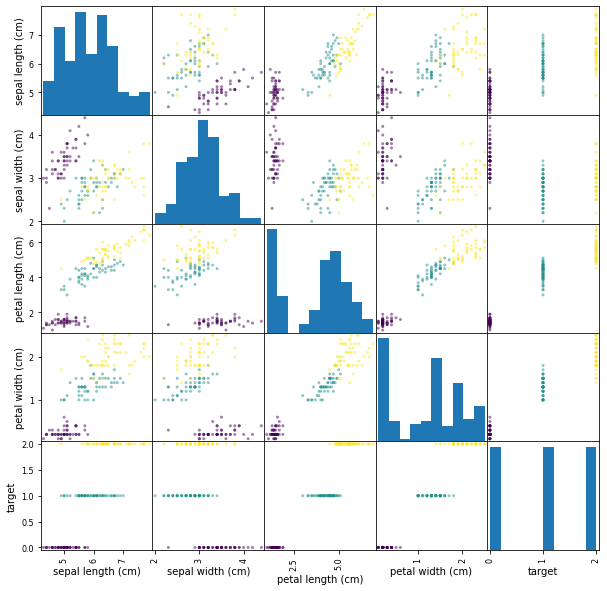

In [46]:
pnd.plotting.scatter_matrix(iris_df, figsize=(10,10), c=iris.target)
plt.plot()

## Création du modèle

Maintenant qu'on a le DataFrame avec les données, on peut créer notre modèle K-Means. 

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=11)
kmeans.fit( iris_df.drop(['target'], axis='columns') )

KMeans(n_clusters=3, random_state=11)

In [49]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


On peut observer que certains "0" et "2" sont melangés (alors que les fleurs sont ordonnées par espèce). 

Afin de visualiser la classification, faisons d'abord l'affichage des labels identifiés par le modèle :

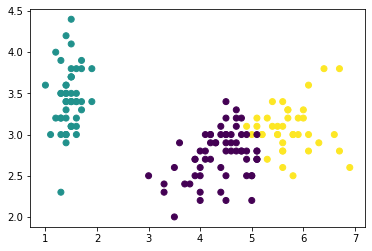

In [50]:
plt.scatter(iris_df['petal length (cm)'], iris_df['sepal width (cm)'], c=kmeans.labels_)
plt.show()

Pour comparer, nous allons aficher maintenant les labels originaux (non fournis lors de l'entraînement) :

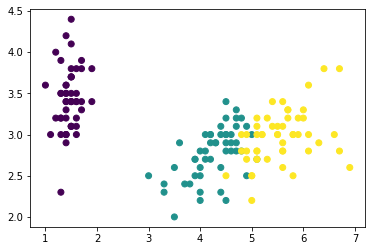

In [ ]:
plt.scatter(iris_df['petal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])
plt.show()